# Данные по ценам на виды энергии и ее добыче

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df_solar = pd.read_csv("solar.csv", sep=",")
df_solar.head()

,date,solar_mwh,solar_capacity
0,2009-02-23,132.096789,30.0
1,2009-03-01,159.502398,30.0
2,2009-03-05,150.760361,19.0
3,2009-05-01,210.070530,12.6
4,2009-05-08,142.783409,230.0


In [7]:
df_wind = pd.read_csv("wind.csv", sep=",")
df_wind.head()

,date,wind_mwh,wind_capacity
0,2009-01-28,54.096687,50.4
1,2009-01-30,62.326818,98.9
2,2009-02-02,52.531046,99.0
3,2009-02-05,93.790168,150.0
4,2009-02-05,96.546638,51.0


In [8]:
df_avg = pd.read_csv("average_cost.csv", sep=",")
df_avg.head()

,year,gas_mwh,solar_mwh,wind_mwh
0,2009,57.645367,167.665053,74.325252
1,2010,56.831714,139.802244,65.501337
2,2011,46.000093,110.855044,47.776246
3,2012,44.487503,84.095776,40.114226
4,2013,43.172493,68.881974,28.722950


In [38]:
wind_new = {}
to_df = {'year': [], 'wind_capacity': []}

for i in range(len(df_wind)):
  date = df_wind.loc[i, 'date']
  d_spl = date.split('-')
  for d in d_spl:
    if len(d) == 4:
      year = int(d)
  if year in wind_new:
    wind_new[year] += df_wind.loc[i, 'wind_capacity']
  else:
    wind_new[year] = df_wind.loc[i, 'wind_capacity']

for i, v in wind_new.items():
  to_df['year'].append(i)
  to_df['wind_capacity'].append(v)

new_wind = pd.DataFrame(to_df)
new_wind.sort_values(by=['year'])

,year,wind_capacity
0,2009,4048.400
1,2010,4864.840
2,2011,4633.870
3,2012,1092.300
4,2013,5411.500
5,2014,2154.650
6,2015,3274.710
7,2016,2497.680
8,2017,3574.705
9,2018,2518.640


In [37]:
solar_new = {}
to_df = {'year': [], 'solar_capacity': []}

for i in range(len(df_solar)):
  date = df_solar.loc[i, 'date']
  d_spl = date.split('-')
  for d in d_spl:
    if len(d) == 4:
      year = int(d)
  if year in solar_new:
    solar_new[year] += df_solar.loc[i, 'solar_capacity']
  else:
    solar_new[year] = df_solar.loc[i, 'solar_capacity']

for i, v in solar_new.items():
  to_df['year'].append(i)
  to_df['solar_capacity'].append(v)

new_solar = pd.DataFrame(to_df)
new_solar.sort_values(by=['year'])

,year,solar_capacity
0,2009,1029.680000
1,2010,1753.450000
2,2011,1810.000000
3,2012,1112.800000
4,2013,708.114000
5,2014,2056.376000
6,2015,3114.377000
7,2016,917.260000
8,2017,2100.030000
9,2018,2919.169481


In [39]:
half = new_wind.merge(new_solar, on=['year'])
half

,year,wind_capacity,solar_capacity
0,2009,4048.400,1029.680000
1,2010,4864.840,1753.450000
2,2011,4633.870,1810.000000
3,2012,1092.300,1112.800000
4,2013,5411.500,708.114000
5,2014,2154.650,2056.376000
6,2015,3274.710,3114.377000
7,2016,2497.680,917.260000
8,2017,3574.705,2100.030000
9,2018,2518.640,2919.169481


In [33]:
df_avg = df_avg.drop(columns = ['gas_mwh'])
df_avg.head()

,year,solar_mwh,wind_mwh
0,2009,167.665053,74.325252
1,2010,139.802244,65.501337
2,2011,110.855044,47.776246
3,2012,84.095776,40.114226
4,2013,68.881974,28.722950


In [41]:
new = half.merge(df_avg, on=['year'])
new

,year,wind_capacity,solar_capacity,solar_mwh,wind_mwh
0,2009,4048.400,1029.680000,167.665053,74.325252
1,2010,4864.840,1753.450000,139.802244,65.501337
2,2011,4633.870,1810.000000,110.855044,47.776246
3,2012,1092.300,1112.800000,84.095776,40.114226
4,2013,5411.500,708.114000,68.881974,28.722950
5,2014,2154.650,2056.376000,57.271352,26.576140
6,2015,3274.710,3114.377000,46.320372,31.153087
7,2016,2497.680,917.260000,39.311474,25.560013
8,2017,3574.705,2100.030000,37.839645,18.357162
9,2018,2518.640,2919.169481,26.965947,16.665450


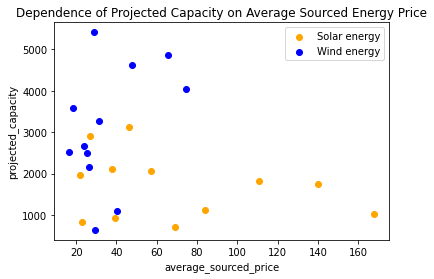

In [46]:
plt.scatter(new['solar_mwh'], new['solar_capacity'], color='orange', label='Solar energy')
plt.scatter(new['wind_mwh'], new['wind_capacity'], color='blue', label='Wind energy')
plt.title('Dependence of Projected Capacity on Average Sourced Energy Price')
plt.xlabel('average_sourced_price')
plt.ylabel('projected_capacity')
plt.legend(loc='best')
plt.savefig('capacity_on_sourced_price.pdf', dpi=600)
plt.show()